# Import library

In [2]:
import os
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from datetime import datetime, date
import scipy.stats as stats
import ast
import statsmodels.api as sm

# Import data

In [3]:
file = pd.read_csv('clean_data.csv')

# Data summarize

In [4]:
print(file.describe())
print(file.columns)

        order_price  delivery_charges  customer_lat  customer_long  \
count   1422.000000       1422.000000   1422.000000    1422.000000   
mean   13347.131979         77.029262    -37.812608     144.967287   
std     7703.487856         14.298177      0.007421       0.021328   
min      580.000000         46.200000    -37.828216     144.921217   
25%     7095.000000         66.525000    -37.818651     144.952312   
50%    12375.000000         76.845000    -37.812877     144.964048   
75%    18480.000000         83.840000    -37.806827     144.981151   
max    37300.000000        110.990000    -37.788265     145.019837   

       coupon_discount   order_total  distance_to_nearest_warehouse  
count      1422.000000   1422.000000                    1422.000000  
mean         11.090014  12019.518572                       1.060155  
std           8.686035   7107.061850                       0.488984  
min           0.000000    568.640000                       0.054900  
25%           5.000

In [5]:
print("The mean, standard deviation of nearest warehouse to the customer location")
print(file["distance_to_nearest_warehouse"].describe())
print()

The mean, standard deviation of nearest warehouse to the customer location
count    1422.000000
mean        1.060155
std         0.488984
min         0.054900
25%         0.723925
50%         1.026700
75%         1.365550
max         3.138800
Name: distance_to_nearest_warehouse, dtype: float64



# Delivery charges versus Distance to the nearest wareshouse

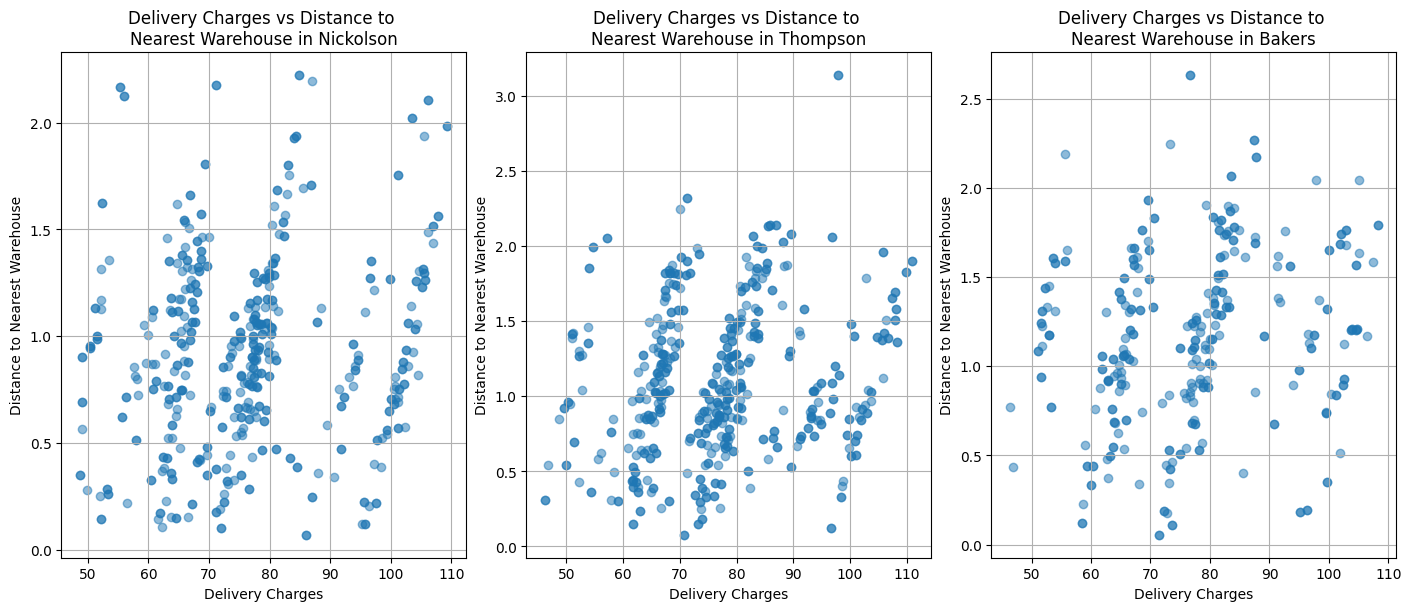

In [6]:
# Selecting the required columns
columns = ['order_price', 'delivery_charges', 'customer_lat', 
           'customer_long', 'coupon_discount', 'order_total', 
           'distance_to_nearest_warehouse']
loc1 = "Nickolson"
loc2 = "Thompson"
loc3 = "Bakers"

# Scatter plot: delivery_charges vs distance_to_nearest_warehouse
plt.figure(figsize=(14, 6), layout='constrained')

plt.subplot(1,3,1)
warehouse_data = file[file["nearest_warehouse"] == loc1]
plt.scatter(warehouse_data['delivery_charges'], warehouse_data['distance_to_nearest_warehouse'], alpha=0.5)
plt.title(f"Delivery Charges vs Distance to \nNearest Warehouse in {loc1}")
plt.xlabel('Delivery Charges')
plt.ylabel('Distance to Nearest Warehouse')
plt.grid(True)

plt.subplot(1,3,2)
warehouse_data = file[file["nearest_warehouse"] == loc2]
plt.scatter(warehouse_data['delivery_charges'], warehouse_data['distance_to_nearest_warehouse'], alpha=0.5)
plt.title(f"Delivery Charges vs Distance to \nNearest Warehouse in {loc2}")
plt.xlabel('Delivery Charges')
plt.ylabel('Distance to Nearest Warehouse')
plt.grid(True)

plt.subplot(1,3,3)
warehouse_data = file[file["nearest_warehouse"] == loc3]
plt.scatter(warehouse_data['delivery_charges'], warehouse_data['distance_to_nearest_warehouse'], alpha=0.5)
plt.title(f"Delivery Charges vs Distance to \nNearest Warehouse in {loc3}")
plt.xlabel('Delivery Charges')
plt.ylabel('Distance to Nearest Warehouse')
plt.grid(True)

# Happy customer per types of discount

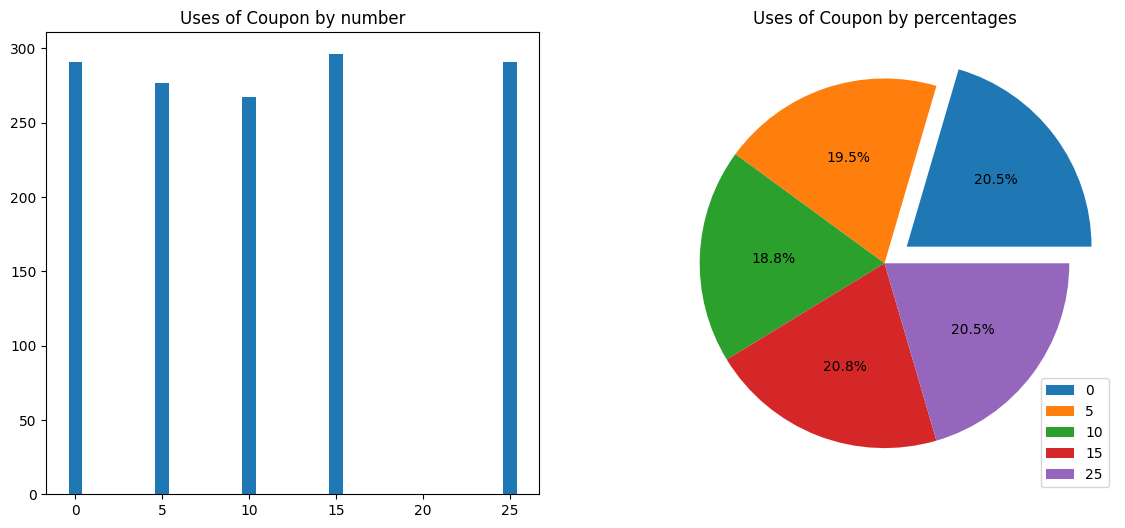

In [7]:
# Bar chart: Uses of Coupon by number
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(14, 6))
labels = sorted(file['coupon_discount'].unique())
counts = file.groupby('coupon_discount')['order_id'].count().tolist()
ax0.bar(labels, counts)
ax0.set_title('Uses of Coupon by number')

# Pie chart: Uses of Coupon by percentages
sizes = (file.groupby('coupon_discount')['order_id'].count()  /  file.groupby('coupon_discount')['order_id'].count().sum() * 100)
explode = (0.15, 0, 0, 0, 0)
ax1.pie(sizes, autopct='%1.1f%%', explode=explode)
ax1.set_title('Uses of Coupon by percentages')
ax1.legend(labels, loc='lower right')
plt.show()

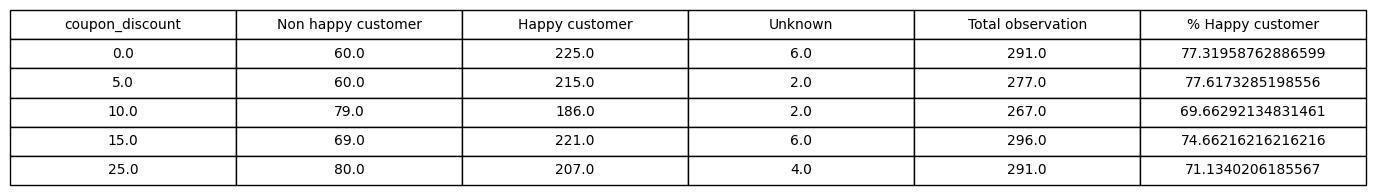

In [8]:
# Create a new figure for the table
plt.figure(figsize=(10, 2))

# Table:
coupon_groups = file.groupby('coupon_discount')['is_happy_customer'].value_counts().unstack(fill_value=0)
coupon_groups['Unknown'] = file.groupby('coupon_discount')['is_happy_customer'].apply(lambda x: x.isna().sum())
coupon_groups.rename(columns={True: 'Happy customer', False: 'Non happy customer'}, inplace=True)
coupon_groups['Total observation'] = coupon_groups.sum(axis=1)
coupon_groups['% Happy customer'] = (coupon_groups['Happy customer'] / coupon_groups['Total observation'] * 100).fillna(0)
coupon_groups.reset_index(inplace=True)
plt.axis('off')
table = plt.table(cellText=coupon_groups.values,
                  colLabels=coupon_groups.columns,
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.75, 1.75)
plt.show()

# QQ plot for order_price

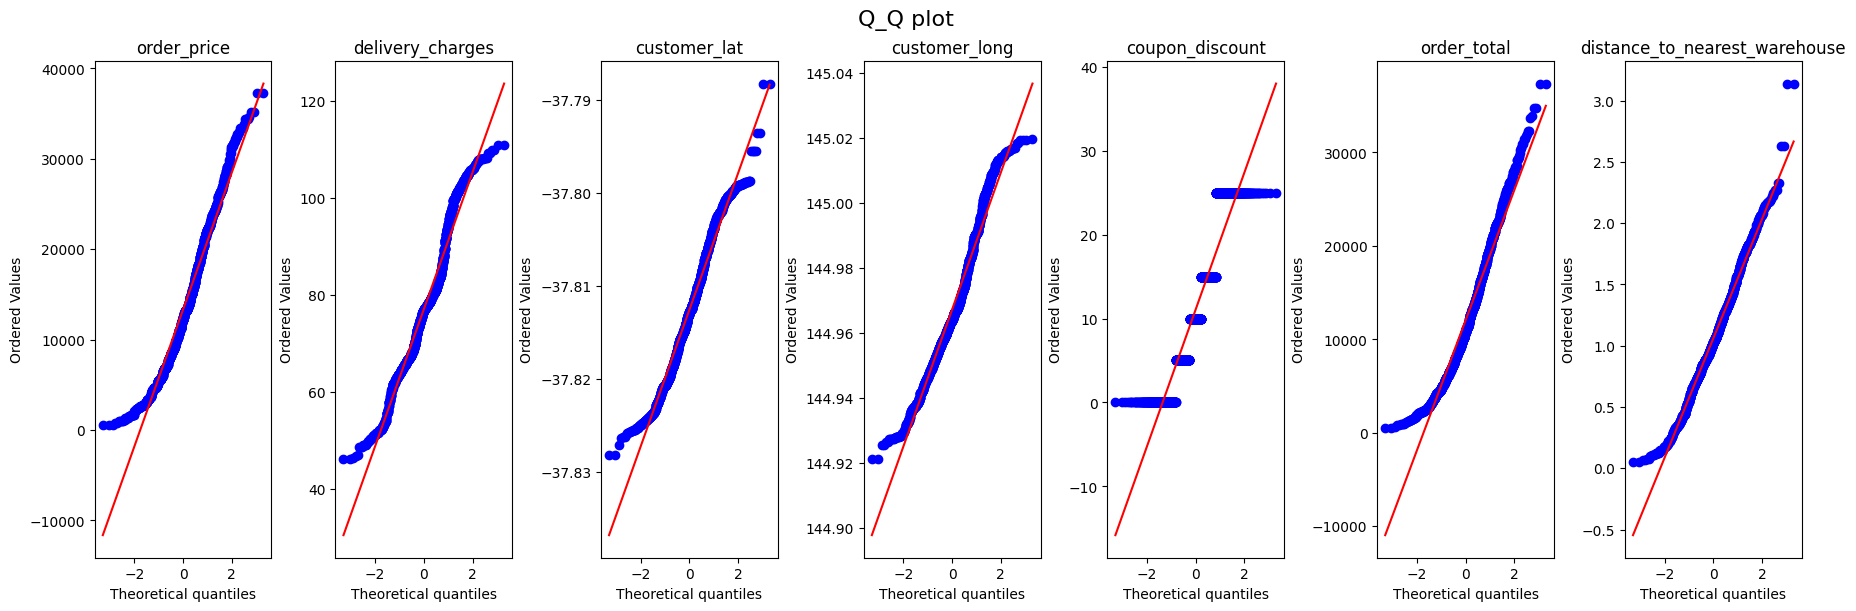

In [9]:
data = pd.read_csv("clean_data.csv")

# Select columns with numberic values then convert to a list
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()

# Q-Q plots with for loop
fig, axes = plt.subplots(1, len(numerical_columns), figsize=(18, 6), layout="constrained")
plt.suptitle("Q_Q plot", fontsize=16)
for i in range(len(numerical_columns)):
    stats.probplot(data[numerical_columns[i]], dist="norm", plot=axes[i])
    axes[i].set_title(f"{numerical_columns[i]}")

# Sold count plot by month

In [10]:
sold_count_by_month = {}

# Iterate over each row
for index, row in file.iterrows():
    # Convert string in the shopping cart into a list of tuples
    shopping_cart = ast.literal_eval(row['shopping_cart'])
    month = pd.to_datetime(row['date']).month

    # Iterate over each item
    for item, quantity in shopping_cart:
        item = item.lower()
        # Update the count of the item sold for each month
        if item not in sold_count_by_month:
            sold_count_by_month[item] = [0] * 12

        sold_count_by_month[item][month - 1] += quantity

In [11]:
# Group items into pairs for plotting
item_pairs = [(list(sold_count_by_month.keys())[i],
               list(sold_count_by_month.keys())[i+1],
               list(sold_count_by_month.keys())[i+2],
               list(sold_count_by_month.keys())[i+3],
               list(sold_count_by_month.keys())[i+4]) for i in range(0, len(sold_count_by_month), 5)]

In [12]:
list(sold_count_by_month.keys())

['lucent 330s',
 'thunder line',
 'istream',
 'peartv',
 'universe note',
 'alcon 10',
 'olivia x460',
 'iassist line',
 'candle inferno',
 'toshika 750']

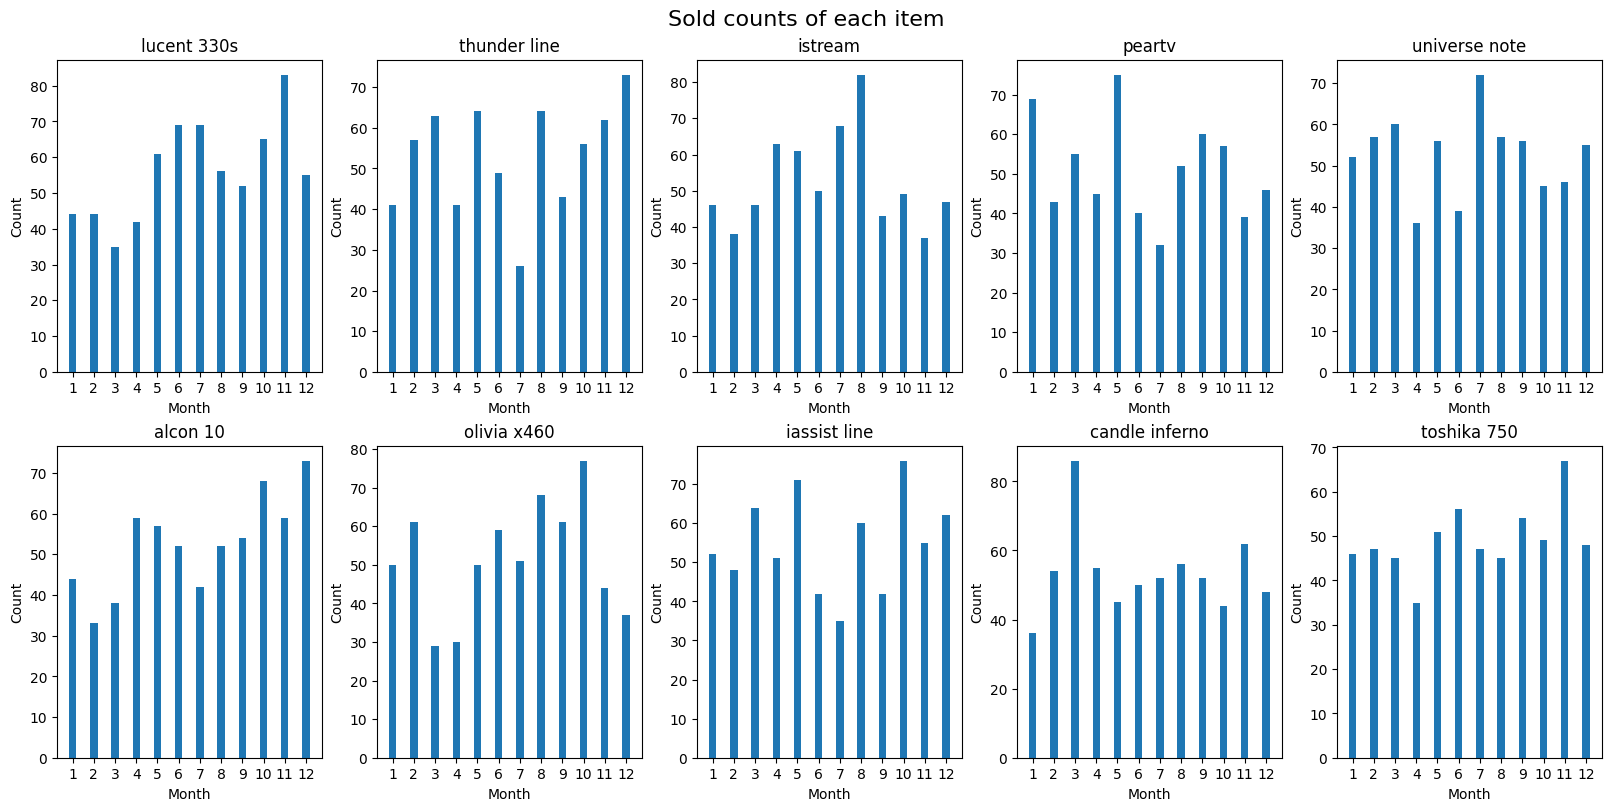

In [25]:
index = np.arange(1, 13)
bar_width = 0.35
fig, axs = plt.subplots(2, 5, figsize=(16, 8), layout="constrained")
fig.suptitle("Sold counts of each item", fontsize=16, fontweight="medium")
for ax, item in zip(axs.flat, sold_count_by_month.keys()):
    ax.bar(index, sold_count_by_month[item], bar_width, label='Sold')
    ax.set_xlabel('Month')
    ax.set_ylabel('Count')
    ax.set_title(f'{item}')
    ax.set_xticks(index)

# Sold count of each item by warehouse plot

In [14]:
sold_count = {'Thompson': {}, 'Bakers': {}, 'Nickolson': {}}

for index, row in file.iterrows():
    shopping_cart = ast.literal_eval(row['shopping_cart'])
    warehouse = row['nearest_warehouse']

    for item, quantity in shopping_cart:
        item = item.lower()
        if item in sold_count[warehouse]:
            sold_count[warehouse][item] += quantity
        else:
            sold_count[warehouse][item] = quantity

In [15]:
# Create a DataFrame from the sold count dictionary
sold_file = pd.DataFrame(sold_count)

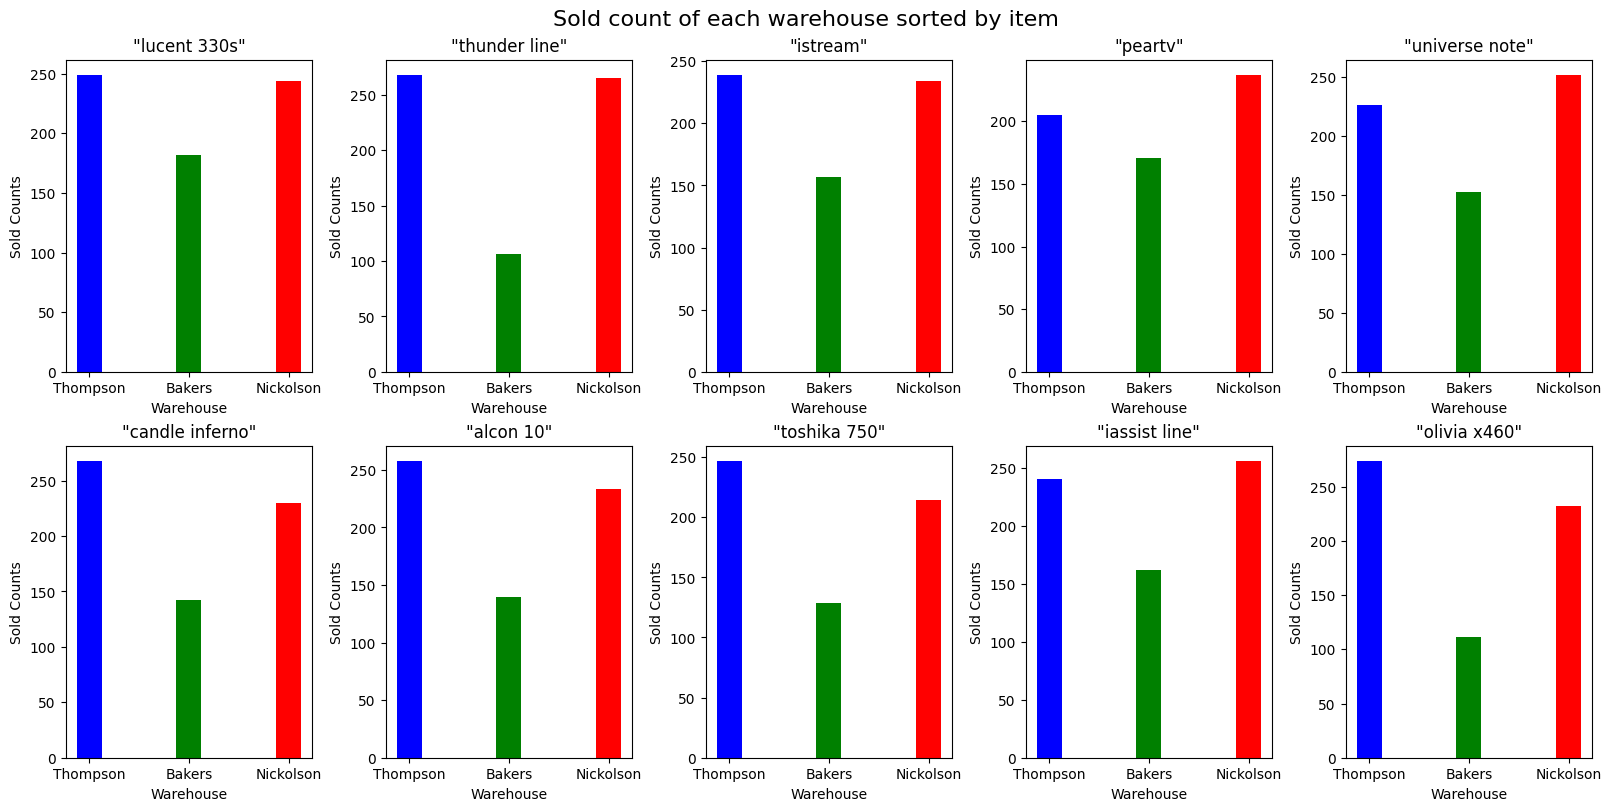

In [24]:
# Plot the sold counts for each nearest warehouse

fig, axs = plt.subplots(2, 5, figsize=(16, 8), layout="constrained")
fig.suptitle("Sold count of each warehouse sorted by item", fontsize=16, fontweight="medium")
for ax, item in zip(axs.flat, sold_file.index.tolist()):
    # Get the sold counts for the item
    sold_counts = sold_file.loc[item].values

    # Set the positions of the bars
    bar_width = 0.25
    index = np.arange(len(sold_counts))

    # Plot the sold counts for each warehouse in a grouped bar graph
    ax.bar(index, sold_counts, bar_width, color=['blue', 'green', 'red'])
    ax.set_xlabel('Warehouse')
    ax.set_ylabel('Sold Counts')
    ax.set_title(f'"{item}"')
    ax.set_xticks(index)
    ax.set_xticklabels(sold_file.columns)

# Order price by month

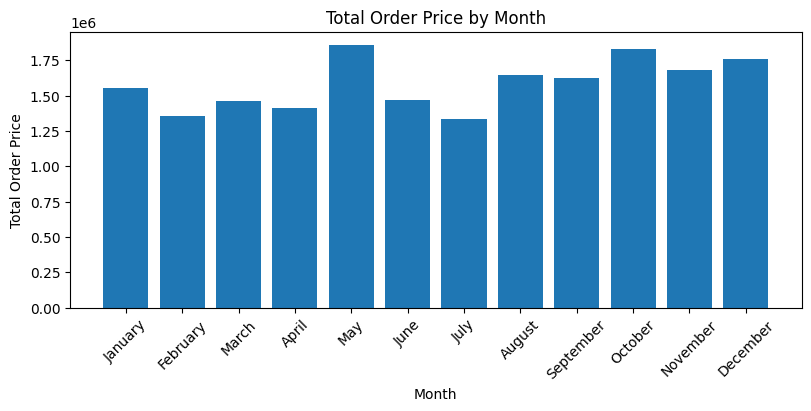

In [17]:
file = pd.read_csv('clean_data.csv')
file['date'] = pd.to_datetime(file['date'])
file['month'] = file['date'].dt.month

total_price_month = file.groupby('month')['order_price'].sum()

plt.figure(figsize=(8, 4), layout="constrained")
plt.bar(total_price_month.index, total_price_month.values)
plt.title('Total Order Price by Month')
plt.xlabel('Month')
plt.ylabel('Total Order Price')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.show()

Text(0.5, 1.0, 'Total Order Price by Month (Table)')

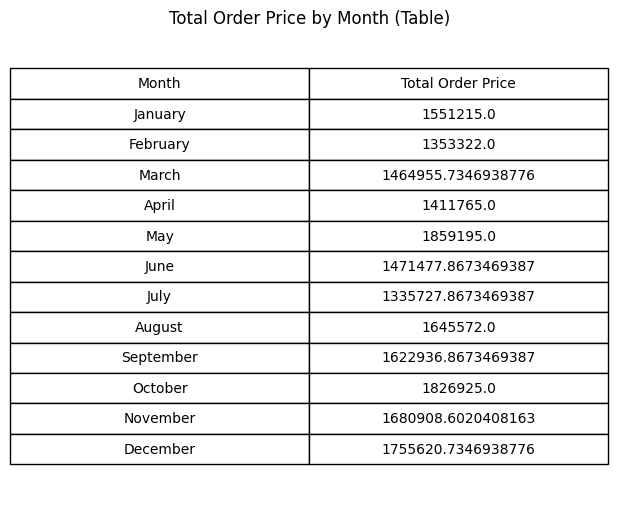

In [18]:
# table
plt.figure(figsize=(6, 5), layout="constrained")
plt.axis('off')
table_data = [(pd.to_datetime(str(month), format='%m').strftime('%B'), total_order_price) for month, total_order_price in zip(total_price_month.index, total_price_month.values)]
table = plt.table(cellText=table_data,
                  colLabels=['Month', 'Total Order Price'],
                  cellLoc='center',
                  loc='center')
table.set_fontsize(10)
table.scale(1.5, 1.5)
plt.title('Total Order Price by Month (Table)')

# Shoping cart review

In [19]:
file = pd.read_csv('clean_data.csv')

item_count = {}
sold_count_by_month = {}
presence_count_by_month = {}

# Iterate over each row
for index, row in file.iterrows():
    # Convert the string of the shopping cart into a list of tuples
    shopping_cart = ast.literal_eval(row['shopping_cart'])
    is_happy_customer = row['is_happy_customer']
    month = pd.to_datetime(row['date']).month

    # Iterate over each item 
    for item in shopping_cart:
        item_name, item_quantity = item
        item_name = item_name.lower()
        
        # Update the count of the item sold, presence, and happy customers
        if item_name in item_count:
            item_count[item_name]['sold']     += item_quantity
            item_count[item_name]['presence'] += 1
            if is_happy_customer:
                item_count[item_name]['happy_customers'] += 1
        else:
            item_count[item_name] = {'sold': item_quantity, 'presence': 1, 'happy_customers': 1 if is_happy_customer else 0}
        
        # Update the count of the item sold and presence for each month
        if item_name not in sold_count_by_month:
            sold_count_by_month[item_name] = [0] * 12
            presence_count_by_month[item_name] = [0] * 12
        sold_count_by_month[item_name][month - 1] += item_quantity
        presence_count_by_month[item_name][month - 1] += 1

# total count of sold items
total_sold_count = sum(item['sold'] for item in item_count.values())

# Create a DataFrame from the item_count dictionary
item_count_df = pd.DataFrame.from_dict(item_count, orient='index')

# Add a row for total sold count of all items
item_count_df.loc['Total Sold Count'] = {'sold': total_sold_count, 'presence': None, 'happy_customers': None}

# the percentage of happy customers for each item
item_count_df['happy_percent'] = (item_count_df['happy_customers'] / item_count_df['presence']) * 100

# Create DataFrames from the dictionaries for sold and presence counts by month
sold_count_df = pd.DataFrame(sold_count_by_month).T.fillna(0)
presence_count_df = pd.DataFrame(presence_count_by_month).T.fillna(0)

print("Item Count:")
print(item_count_df)
print("\nSold Count by Month:")
print(sold_count_df)
print("\nPresence Count by Month:")
print(presence_count_df)

Item Count:
                  sold presence happy_customers happy_percent
lucent 330s        675      444             348     78.378378
thunder line       639      427             309      72.36534
istream            630      409             316     77.261614
peartv             613      412             315     76.456311
universe note      631      433             319     73.672055
alcon 10           631      424             312     73.584906
olivia x460        617      422             333     78.909953
iassist line       658      443             326     73.589165
candle inferno     640      422             322     76.303318
toshika 750        590      389             295     75.835476
Total Sold Count  6324     None            None           NaN

Sold Count by Month:
                0   1   2   3   4   5   6   7   8   9   10  11
lucent 330s     44  44  35  42  61  69  69  56  52  65  83  55
thunder line    41  57  63  41  64  49  26  64  43  56  62  73
istream         46  38  46  63  6

# Warehouse revenue

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8680\1915121570.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  file['is_happy_customer'] = file['is_happy_customer'].fillna(False)


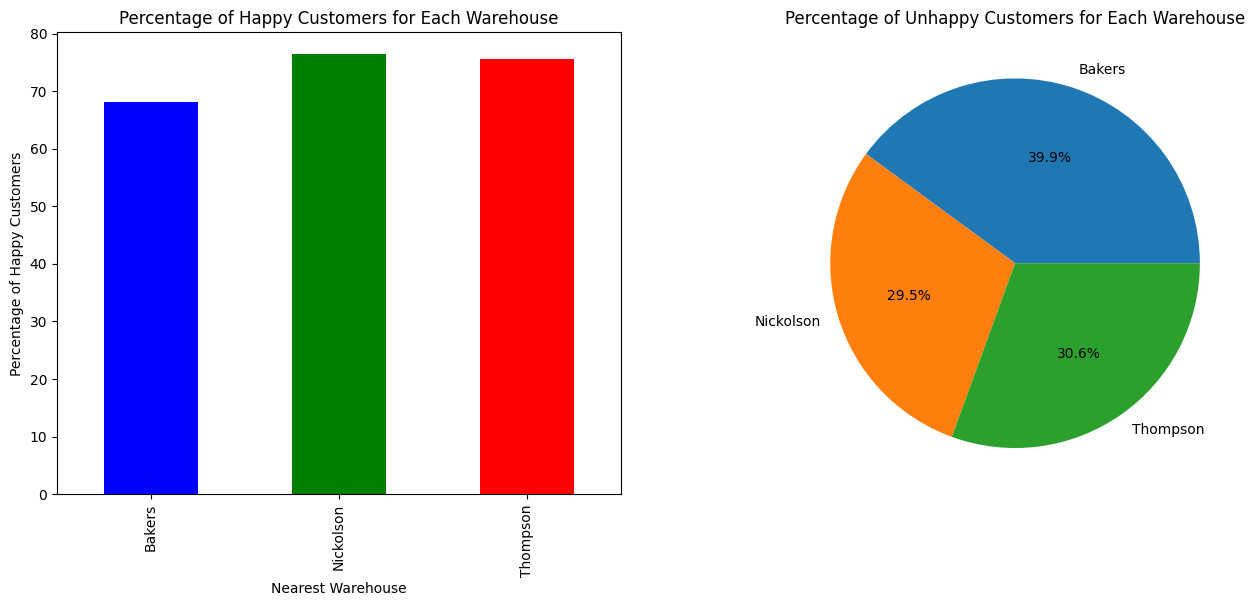

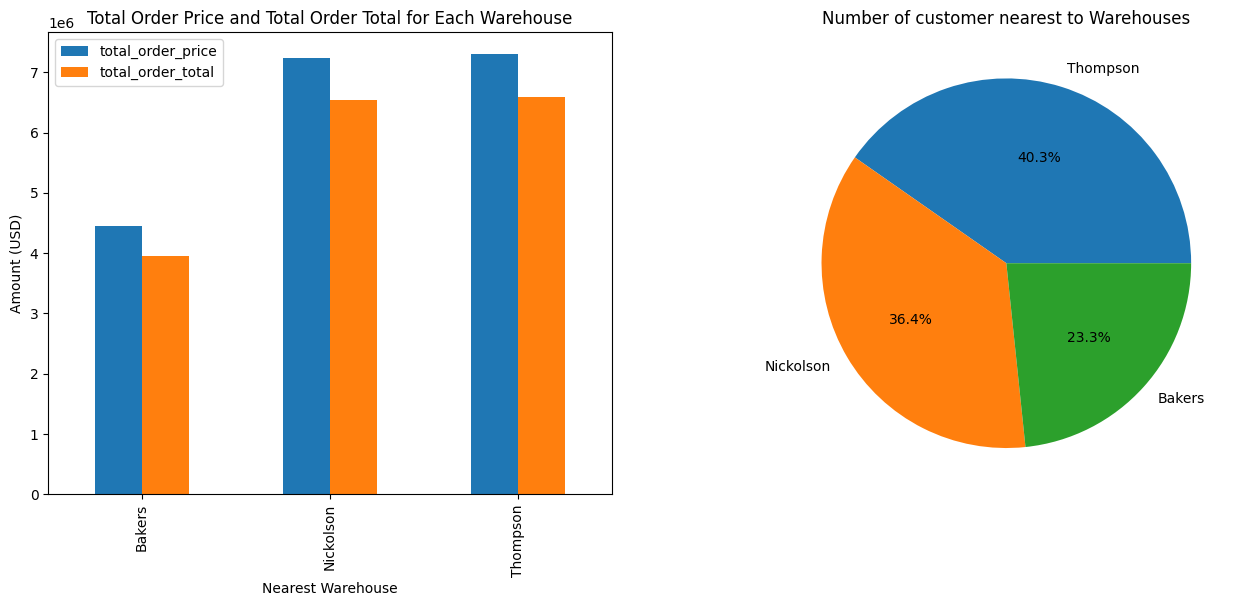

In [20]:
file = pd.read_csv('clean_data.csv')

file['is_happy_customer'] = file['is_happy_customer'].fillna(False)

# Group by 'nearest_warehouse' and calculate total 'order_price', 'order_total', and percentage of 'is_happy_customer'
warehouse_stats = file.groupby('nearest_warehouse').agg(
    total_order_price=('order_price', 'sum'),
    total_order_total=('order_total', 'sum'),
    happy_customer_percentage=('is_happy_customer', lambda x: (x.sum() / x.count()) * 100),
    unhappy_customer_percentage=('is_happy_customer', lambda x: ((x == False).sum() / x.count()) * 100)
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart for happy customer
warehouse_stats['happy_customer_percentage'].plot(kind='bar', ax=ax1, color=['blue', 'green', 'red'])
ax1.set_title('Percentage of Happy Customers for Each Warehouse')
ax1.set_xlabel('Nearest Warehouse')
ax1.set_ylabel('Percentage of Happy Customers')

# Pie chart for unhappy customer 
warehouse_stats['unhappy_customer_percentage'].plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Percentage of Unhappy Customers for Each Warehouse')
ax2.set_ylabel('')
plt.show()


# Group by 'nearest_warehouse' and calculate the count of records for each warehouse
warehouse_counts = file['nearest_warehouse'].value_counts(normalize=True) * 100

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart for order price and order total
warehouse_stats[['total_order_price', 'total_order_total']].plot(kind='bar', ax=ax3)
ax3.set_title('Total Order Price and Total Order Total for Each Warehouse')
ax3.set_xlabel('Nearest Warehouse')
ax3.set_ylabel('Amount (USD)')

# Pie chart for warehouse distribution
ax4.pie(warehouse_counts, labels=warehouse_counts.index, autopct='%1.1f%%')
ax4.set_title('Number of customer nearest to Warehouses')
plt.show()

# Linear regression

In [21]:
data = pd.read_csv('clean_data.csv')

# Define X and y for Order Price vs Order Total
X_price = data['order_price']        # We use 'order_price' as predictor
y_total = data['order_total']        # 'order_total' is the respond

# Add constant to X for the intercept
X_price = sm.add_constant(X_price)
# Fit the linear regression model for Order Price vs Order Total
# Find theOrdinary Least Squares (OLS) and fit the Linear Regression
model_order_total = sm.OLS(y_total, X_price).fit()

# DO THE SAME for Delivery Charges vs Distance to Nearest Warehouse
X_delivery = data['delivery_charges']                # as predictor
y_distance = data['distance_to_nearest_warehouse']   # as respond var
X_delivery = sm.add_constant(X_delivery)
model_delivery_charges = sm.OLS(y_distance, X_delivery).fit()

# Output summary of regression results for Order Price vs Order Total
print("Regression Results for Order Price vs Order Total:")
print(model_order_total.summary())
# Results for Delivery Charges vs Distance to Nearest Warehouse
print("\nRegression Results for Delivery Charges vs Distance to Nearest Warehouse:")
print(model_delivery_charges.summary())

Regression Results for Order Price vs Order Total:
                            OLS Regression Results                            
Dep. Variable:            order_total   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 2.178e+04
Date:                Wed, 15 May 2024   Prob (F-statistic):               0.00
Time:                        05:22:17   Log-Likelihood:                -12643.
No. Observations:                1422   AIC:                         2.529e+04
Df Residuals:                    1420   BIC:                         2.530e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

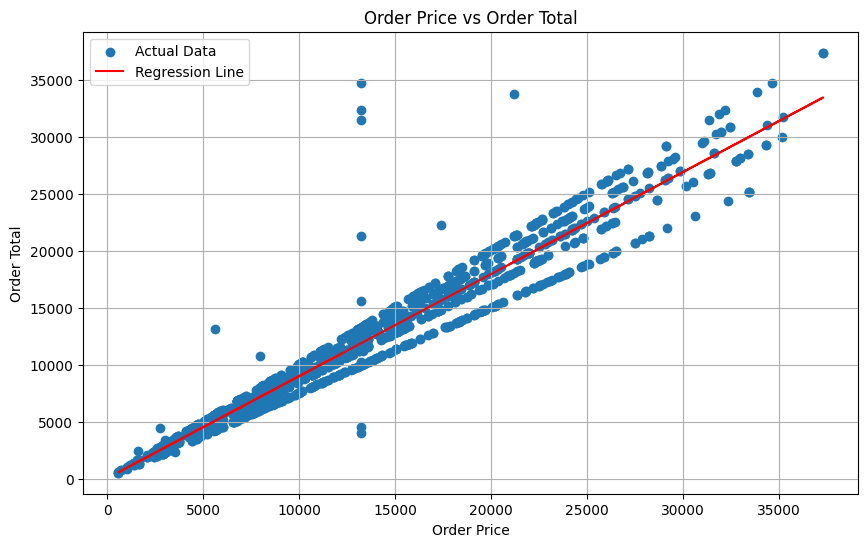

In [22]:
# Scatter Plot and Regression Line for Delivery Charges vs Distance to Nearest Warehouse
plt.figure(figsize=(10, 6))
plt.scatter(X_price.iloc[:, 1], y_total, label='Actual Data')  # Corrected variable usage here
plt.plot(X_price.iloc[:, 1], model_order_total.predict(X_price), color='red', label='Regression Line')
plt.title('Order Price vs Order Total')
plt.xlabel('Order Price')
plt.ylabel('Order Total')
plt.legend()
plt.grid(True)

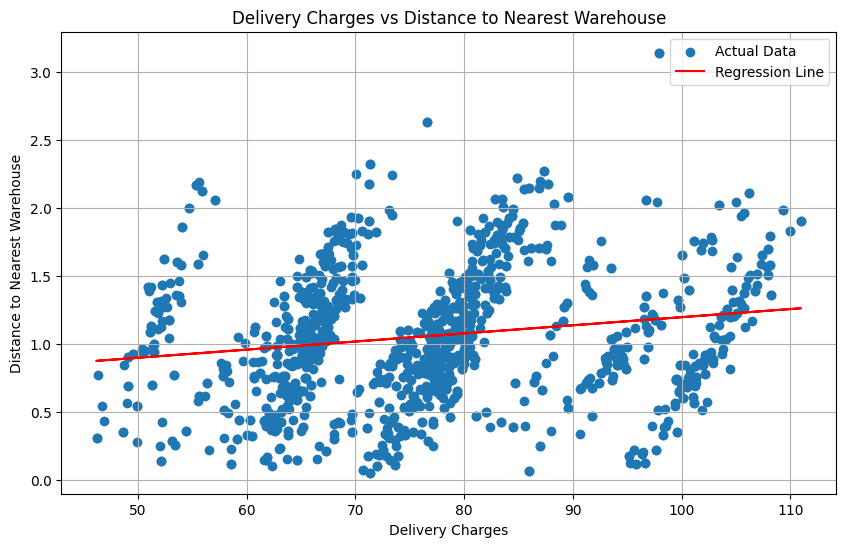

In [23]:
# Scatter Plot and Regression Line for Delivery Charges vs Distance to Nearest Warehouse
plt.figure(figsize=(10, 6))
plt.scatter(X_delivery.iloc[:, 1], y_distance, label='Actual Data')  # Use iloc[:, 1] to access the second column (delivery charges)
plt.plot(X_delivery.iloc[:, 1], model_delivery_charges.predict(X_delivery), color='red', label='Regression Line')
plt.title('Delivery Charges vs Distance to Nearest Warehouse')
plt.xlabel('Delivery Charges')
plt.ylabel('Distance to Nearest Warehouse')
plt.legend()
plt.grid(True)